In [ ]:
Problem 1 (50 points)

In [ ]:
a) Fit a PCA model to log returns  (log return = log( Price [t+1]/Price [t]) 
derived from stock price data and complete the following tasks (25 points)


In [ ]:
1. Derive log returns from the raw stock price dataset

In [2]:
import pandas as pd
import numpy as np

# ... rest of your code ...

# Load the raw stock price dataset
raw_data = pd.read_csv("/Users/alkutgalip/Downloads/SP500_close_price_no_missing.csv", index_col=0)

# Calculate log returns
log_returns = raw_data.pct_change().apply(lambda x: np.log(1 + x))

# Drop the first row with NaN values
log_returns = log_returns.dropna()

# Display the first few rows of the log returns data
print(log_returns.head())


                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-05  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-06 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-07  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-10  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   

                 AES       AET       AFL         A  ...       WYN      WYNN  \
date                                                ...                       
2011-01-04  0.004773  0.005141 -0.018417 -0.009356  ... -0.006214  0.030719   
2011-01-05  0.013402  0.009569 -0.001949 -0.002172  ... -0.003286  0.012819   
2011-01-06  0.017081  0.018557 -0.005514  0.001931  ... -0.014589  0.007264   
2011-01-07  0.000000  0.002179 -0.003931  0.003369  ... -0.003681  0.034794   
2011-01

In [3]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 2011-01-03 to 2014-12-31
Columns: 471 entries, MMM to ZION
dtypes: float64(471)
memory usage: 3.8+ MB
None


In [ ]:
2. * Plot a scree plot which shows the distribution of variance contained in subsequent 
principal components sorted by their eigenvalues.

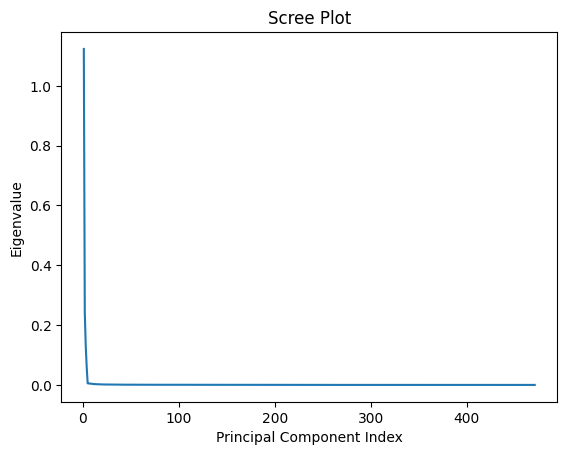

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA model
pca = PCA()
pca.fit(log_returns)

# Plot scree plot
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()


In [ ]:
3. * Create a second plot showing cumulative variance retained if top N components are kept after 
dimensionality reduction (i.e. the horizontal axis will show the number of components kept, 
the vertical axis will show the cumulative percentage of variance retained).

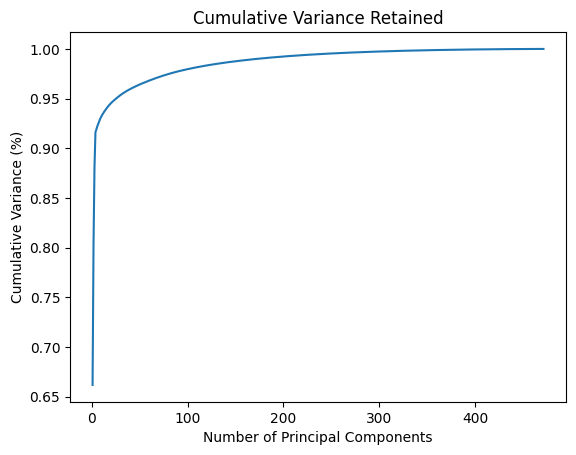

In [5]:
# Calculate cumulative variance retained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance retained
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()


In [ ]:
4. * How many principal components must be retained in order to capture at least 80% of the total variance in data?

In [6]:
# Find the number of components to capture at least 80% of the total variance
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1

# Display the result
print(f"Number of components to capture 80% of variance: {n_components_80}")


Number of components to capture 80% of variance: 2


In [ ]:
b) Analysis of principal components and weights (25 points)

In [ ]:
1. *Compute and plot the time series of the 1st principal component and observe temporal patterns. 
Identify the date with the lowest value for this component and conduct a quick research on the Internet 
to see if you can identify event(s) that might explain the observed behavior.

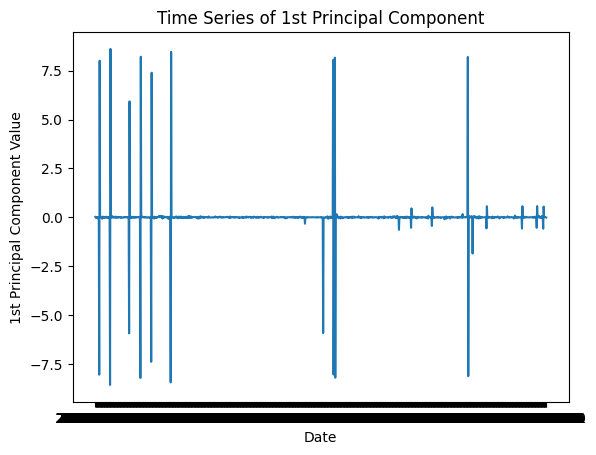

Date with the lowest value for the 1st principal component: 2011-02-21


In [8]:
# Plot the time series of the 1st principal component
plt.plot(raw_data.index[1:], first_principal_component)
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_date_index = np.argmin(first_principal_component)
min_date = raw_data.index[1:][min_date_index]
print(f"Date with the lowest value for the 1st principal component: {min_date}")



In [ ]:
2. Extract the weights from the PCA model for 1st and 2nd principal components. 

In [9]:
# Extract weights for the 1st and 2nd principal components
weights_1st_pc = pca.components_[0]
weights_2nd_pc = pca.components_[1]


In [17]:
# Load the ticker information dataset
ticker_info = pd.read_csv("/Users/alkutgalip/Downloads/SP500_ticker.csv", encoding='latin1')

# Display the column names
print("Column names in the dataset:")
print(ticker_info.columns)


Column names in the dataset:
Index(['ticker', 'company_name', 'sector'], dtype='object')


In [18]:
print(ticker_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        500 non-null    object
 1   company_name  500 non-null    object
 2   sector        500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
None


In [ ]:
3. *Create a plot to show weights of the 1st principal component grouped by the industry sector (for example, 
you may draw a bar plot of mean weight per sector). Observe the distribution of weights (magnitudes, signs). 
Based on your observation, what kind of information do you think the 1st principal component might have captured?

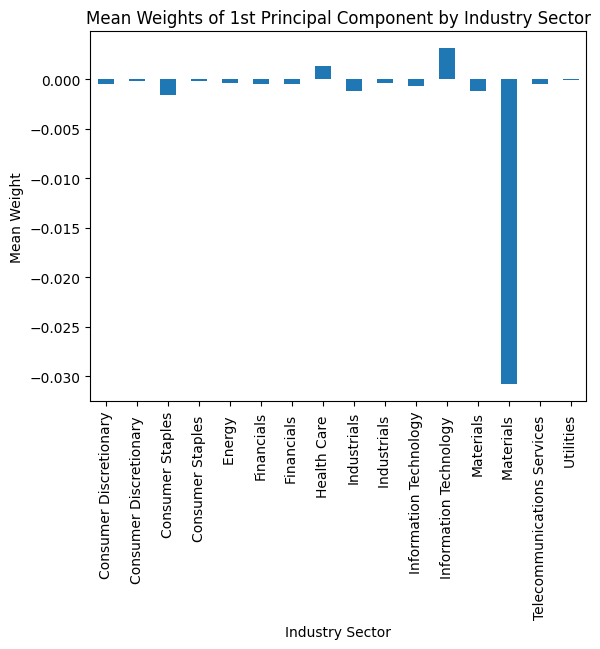

In [19]:
# Load ticker information with a specific encoding
ticker_info = pd.read_csv("/Users/alkutgalip/Downloads/SP500_ticker.csv", encoding='latin1')

# Merge weights with sector information
weights_df = pd.DataFrame({'Sector': raw_data.columns, 'Weight': weights_1st_pc})
merged_df = pd.merge(weights_df, ticker_info, left_on='Sector', right_on='ticker', how='left')

# Plot bar plot of mean weight per sector for the 1st principal component
mean_weights_by_sector = merged_df.groupby('sector')['Weight'].mean()
mean_weights_by_sector.plot(kind='bar')
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


In [ ]:
4. *Make a similar plot for the 2nd principal component.  
What kind of information do you think does this component reveal? (Hint: look at the signs and magnitudes.)

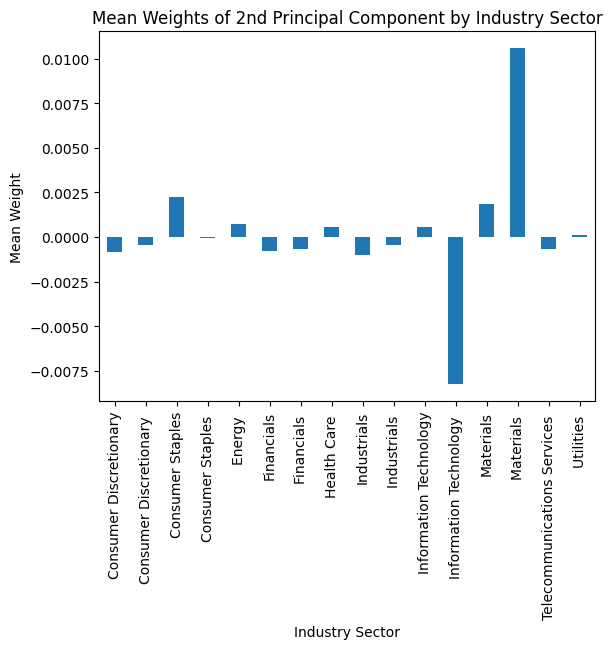

In [20]:
# Merge weights for the 2nd principal component with sector information
weights_df_2nd_pc = pd.DataFrame({'Sector': raw_data.columns, 'Weight': weights_2nd_pc})
merged_df_2nd_pc = pd.merge(weights_df_2nd_pc, ticker_info, left_on='Sector', right_on='ticker', how='left')

# Plot bar plot of mean weight per sector for the 2nd principal component
mean_weights_by_sector_2nd_pc = merged_df_2nd_pc.groupby('sector')['Weight'].mean()
mean_weights_by_sector_2nd_pc.plot(kind='bar')
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


In [ ]:
c) Bonus points (20 points)

In [ ]:
Rerun the PCA analysis with the most updated data downloaded from the available stock price API. 

In [24]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp311-cp311-macosx_10_9_x86_64.whl size=248605 sha256=4e71eea836d7ff94972bc06df086e2d278fbe479b73aca0bf44e48c731e64644
  Stored in directory: /Users/

In [25]:
# Assuming you have a function to retrieve stock prices from the API
def get_stock_prices(api_key, tickers, start_date, end_date):
    # Placeholder code, replace with actual API request
    # Example using yfinance library
    import yfinance as yf
    stock_data = yf.download(tickers, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Placeholder data (replace with actual API key, tickers, and dates)
api_key = 'your_api_key'
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = '2023-01-01'
end_date = '2023-12-31'

# Get updated stock prices
updated_stock_prices = get_stock_prices(api_key, tickers, start_date, end_date)

# Calculate log returns
updated_log_returns = updated_stock_prices.pct_change().apply(lambda x: np.log(1 + x)).dropna()

# Run PCA on the updated data
updated_pca = PCA()
updated_pca.fit(updated_log_returns)

# Extract relevant information from the updated PCA model
updated_weights_1st_pc = updated_pca.components_[0]
updated_weights_2nd_pc = updated_pca.components_[1]
updated_first_principal_component = updated_pca.transform(updated_log_returns)[:, 0]


[*********************100%%**********************]  5 of 5 completed


In [ ]:
Problem 2  (50 points)

In [28]:
import pandas as pd

# Load the CSV file
bmi_data = pd.read_csv('/Users/alkutgalip/Downloads/BMI.csv')

# Display basic information about the dataset
print("First few rows of the dataset:")
print(bmi_data.head())

print("\nInformation about the dataset:")
print(bmi_data.info())


First few rows of the dataset:
   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0   22   160.8    62.4  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
1   22   170.6    80.5  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2   23   153.9    69.3  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
3   23   157.1    70.4  35.5   92.1     77.1   93.9   56.1  36.1   22.7   
4   23   196.5    88.6  38.0   96.6     85.3  102.5   59.1  37.6   23.2   

   Biceps  Forearm  Wrist  fatpctg  
0    28.8     25.2   16.6     25.3  
1    30.5     28.9   18.2      6.1  
2    32.0     27.4   17.1     12.3  
3    30.5     27.2   18.2      9.4  
4    31.8     29.7   18.3     10.3  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   He

In [39]:
print(len(fit_forward.ranking_))
print(len(selected_features_forward))


13
1


In [42]:
print(fit_forward.ranking_)
print(selected_features_forward)


[11 12  8  3  7  2  5 10 13  9  4  6  1]
Index(['Wrist'], dtype='object')


In [ ]:
a) Wrapper method: Search for the best set of features using backward and forward stepwise regression

/var/folders/gj/wrpyklq54y97gzjz_l71lh700000gp/T/ipykernel_60308/3752502233.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=ranking_backward, y=selected_features_backward, palette="viridis", ci=None)
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dty

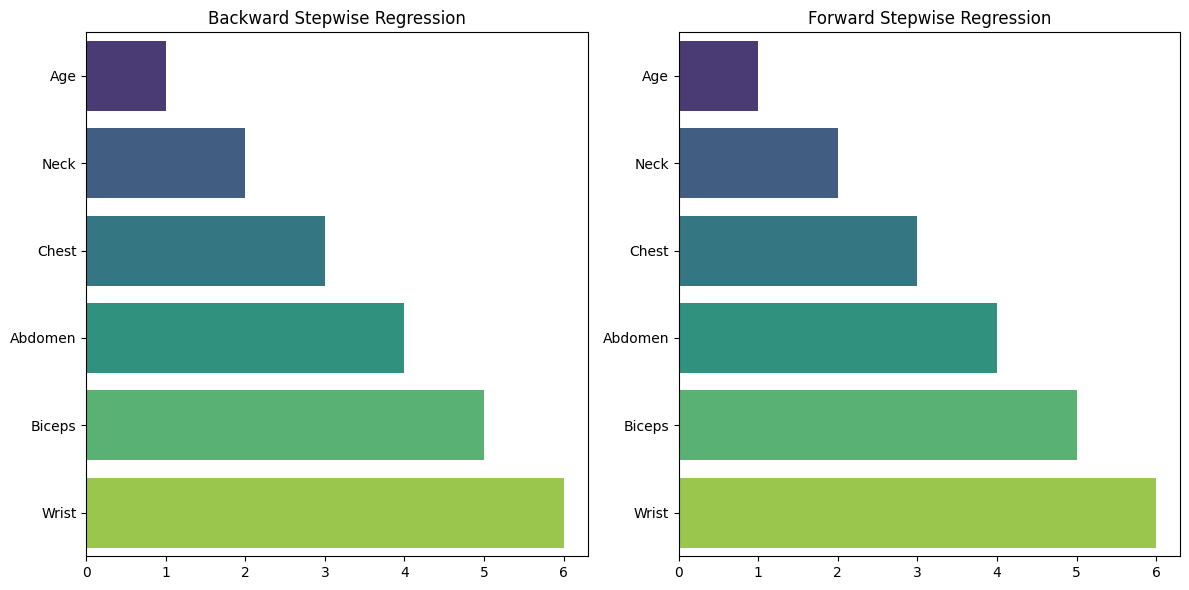

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Backward Stepwise Regression
fit_backward = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=False, floating=False, scoring='r2', cv=5)
fit_backward = fit_backward.fit(X_train, y_train)

# Forward Stepwise Regression
fit_forward = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=True, floating=False, scoring='r2', cv=5)
fit_forward = fit_forward.fit(X_train, y_train)

# Get selected features and their rankings for backward stepwise regression
selected_features_backward = X_train.columns[list(fit_backward.k_feature_idx_)]
ranking_backward = np.arange(1, len(selected_features_backward) + 1)

# Get selected features and their rankings for forward stepwise regression
selected_features_forward = X_train.columns[list(fit_forward.k_feature_idx_)]
ranking_forward = np.arange(1, len(selected_features_forward) + 1)

# Wrapper Method Results
plt.figure(figsize=(12, 6))

# Backward Stepwise Regression
plt.subplot(1, 2, 1)
sns.barplot(x=ranking_backward, y=selected_features_backward, palette="viridis", ci=None)
plt.title('Backward Stepwise Regression')

# Forward Stepwise Regression
plt.subplot(1, 2, 2)
sns.barplot(x=ranking_forward, y=selected_features_forward, palette="viridis", ci=None)
plt.title('Forward Stepwise Regression')

plt.tight_layout()
plt.show()


In [ ]:
b) Filter method:  output a ranking of features using correlation statistics 
(i.e. between any of the input variables and output) 

/var/folders/gj/wrpyklq54y97gzjz_l71lh700000gp/T/ipykernel_60308/2457405820.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted_features.values, y=sorted_features.index, palette="viridis", ci=None)
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dt

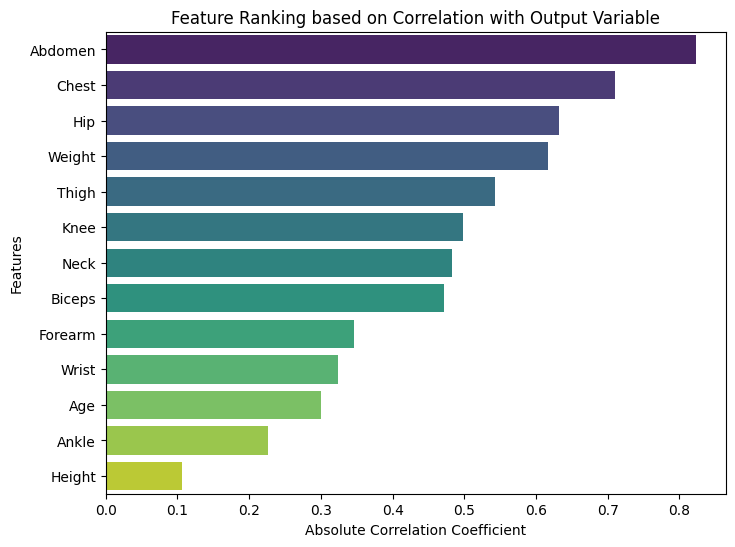

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between input features and the output variable
correlations = X_train.corrwith(y_train)

# Sort features based on absolute correlation values
sorted_features = correlations.abs().sort_values(ascending=False)

# Filter Method Results
plt.figure(figsize=(8, 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index, palette="viridis", ci=None)
plt.title('Feature Ranking based on Correlation with Output Variable')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [ ]:
c) Embedded method: (1) Lasso regression; 

In [ ]:
Filter method:  output a ranking of features using correlation statistics 
(i.e. between any of the input variables and output) 

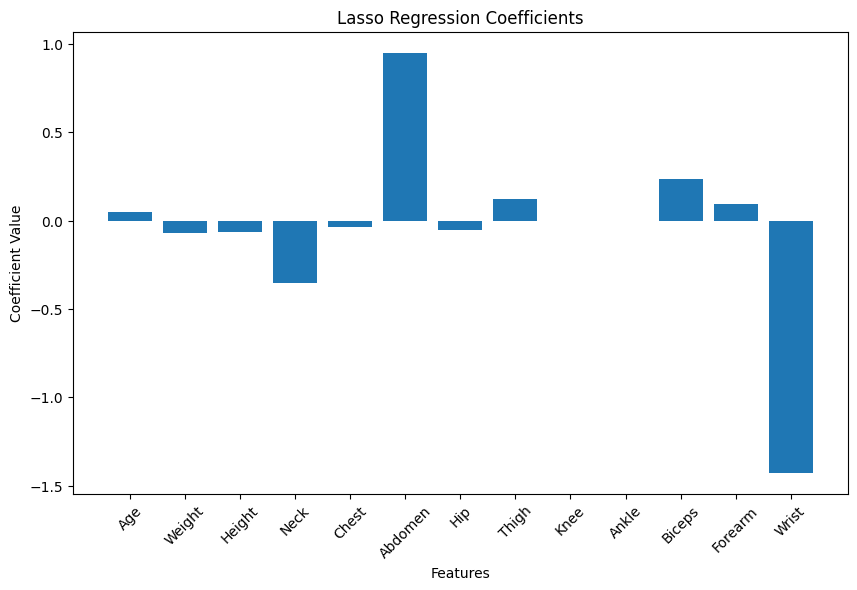

Selected features using Lasso regression: Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


In [47]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Fit Lasso regression model
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)

# Get selected features based on non-zero coefficients
selected_features_lasso = X_train.columns[lasso_model.coef_ != 0]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, lasso_model.coef_)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.show()

print("Selected features using Lasso regression:", selected_features_lasso)


In [ ]:
c) Embedded method: (2) random forest (feature importance ranking) 

/var/folders/gj/wrpyklq54y97gzjz_l71lh700000gp/T/ipykernel_60308/2199674196.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=sorted_features_rf, palette="viridis", ci=None)
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/alkutgalip/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

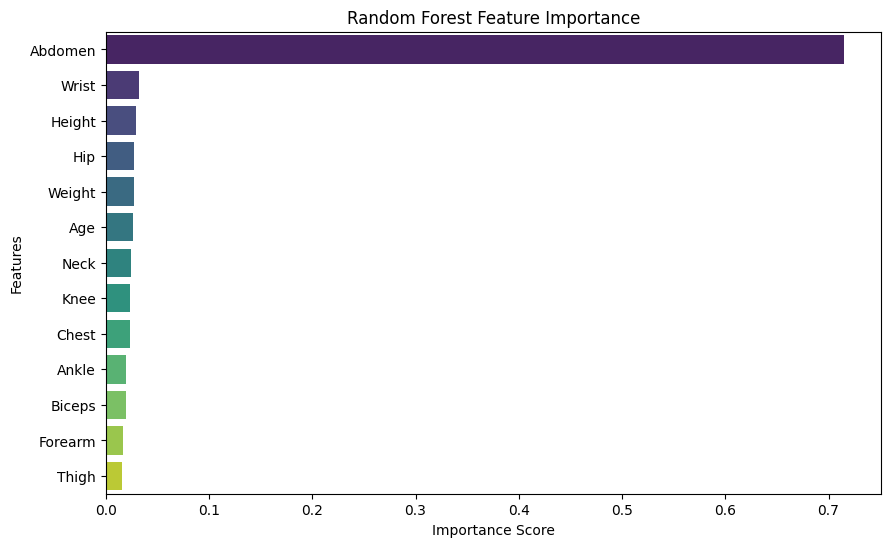

Feature importances using Random Forest: ['Abdomen', 'Wrist', 'Height', 'Hip', 'Weight', 'Age', 'Neck', 'Knee', 'Chest', 'Ankle', 'Biceps', 'Forearm', 'Thigh']


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
sorted_features_rf = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_features_rf, palette="viridis", ci=None)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("Feature importances using Random Forest:", sorted_features_rf['Feature'].tolist())
